# Испит по Основи на Вештачката Интелигенција

**Датум**: 18.02.2021

## Задача 3

**(25 поени)** 
Дадено е влезно-излезното множество за обучување од долната таблица со $12$ податоци, од кои $6$ се позитивни $(y = 1)$, а $6$ се негативни $(y = 0)$. Влезниот вектор има три карактеристики $x_1$, $x_2$ и $x_3$ .

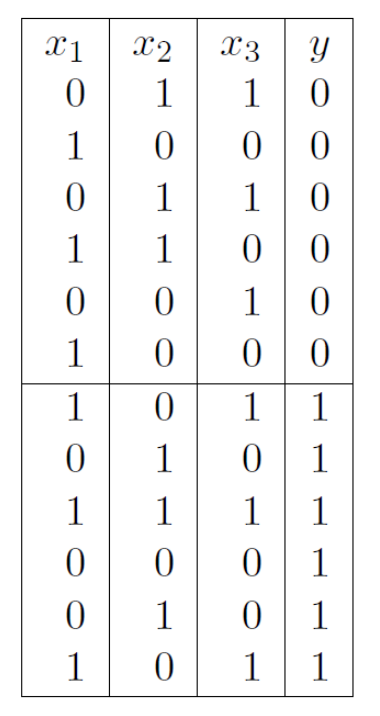

In [1]:
from IPython import display
display.Image('images/3-1.png', width=240)

Во продолжение е даден бројот позитивни и негативни примероци во кои секоја од влезните карактеристики има вредност $1$.

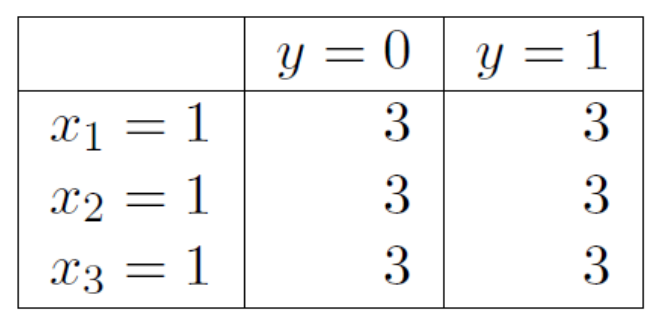

In [9]:
from IPython import display
display.Image('images/3-2.png', width=300)

Ако се примени Наивниот Бејесов алгоритам за учење, кои се вредностите на параметрите $R_i(1, 0)$ и $R_i(1, 1)$ за секоја од карактеристиките $i = 1 , 2 , 3$, со примена на
Лапласовата корекција?

* R1(1,0)=3/6 pred laplasova -> R1(1,0)=4/8   * R1(1,1)=4/8
* R2(1,0)=3/6 pred laplasova -> R2(1,0)=4/8   * R2(1,1)=4/8
* R3(1,0)=3/6 pred laplasova -> R3(1,0)=4/8   * R3(1,1)=4/8

Како ќе го класифицира Наивниот Бејесов алгоритам влезниот податок $(1, 1, 1)$ врз основа на параметрите пресметани во претходниот чекор?

* s0=R1(1,0)*R2(1,0)*R3(1,0)=1/2*1/2*1/2=1/8
* s1=R1(1,1)*R2(1,1)*R3(1,1)=1/2*1/2*1/2=1/8
* бидејќи се еднакви не може да се класифицира

Очигледно, Наивниот Бејесов алгоритам за учење не се покажува добар во овој случај. Зошто?

* бидејќи има еднаков број случаи при кои xi=1 дава и y=1 и y=0

Дали проблемот може да се реши со стебло на одлучување? Во случај на позитивен одговор, да се нацрта соодветното стебло.

* бидејќи имаме податоци кои не е дека се појавуваат ретко, и ќе имаме две класи во однос на кои ќе разгледуваме, и не можеме да заклучиме дали сите карактеристики се подеднакво битни и тотално независни едни од други, дрвото на одличување ќе даде подобри резултати

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

In [2]:
df=pd.DataFrame([
    [0,1,1,0],
    [1,0,0,0],
    [0,1,1,0],
    [1,1,0,0],
    [0,0,1,0],
    [1,0,0,0],
    [1,0,1,1],
    [0,1,0,1],
    [1,1,1,1],
    [0,0,0,1],
    [0,1,0,1],
    [1,0,1,1]],columns=['x1','x2','x3','y'])
df

,x1,x2,x3,y
0,0,1,1,0
1,1,0,0,0
2,0,1,1,0
3,1,1,0,0
4,0,0,1,0
5,1,0,0,0
6,1,0,1,1
7,0,1,0,1
8,1,1,1,1
9,0,0,0,1


In [3]:
x=df.drop(columns='y')
y=df['y']

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 24)

In [5]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [6]:
y_pred = dtree.predict(x_test)
y_pred

array([1, 0, 1, 1])

In [7]:
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=dtree.predict(x_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy Score on train data:  1.0
Accuracy Score on test data:  1.0


In [8]:
import matplotlib.pyplot as plt
from sklearn import tree

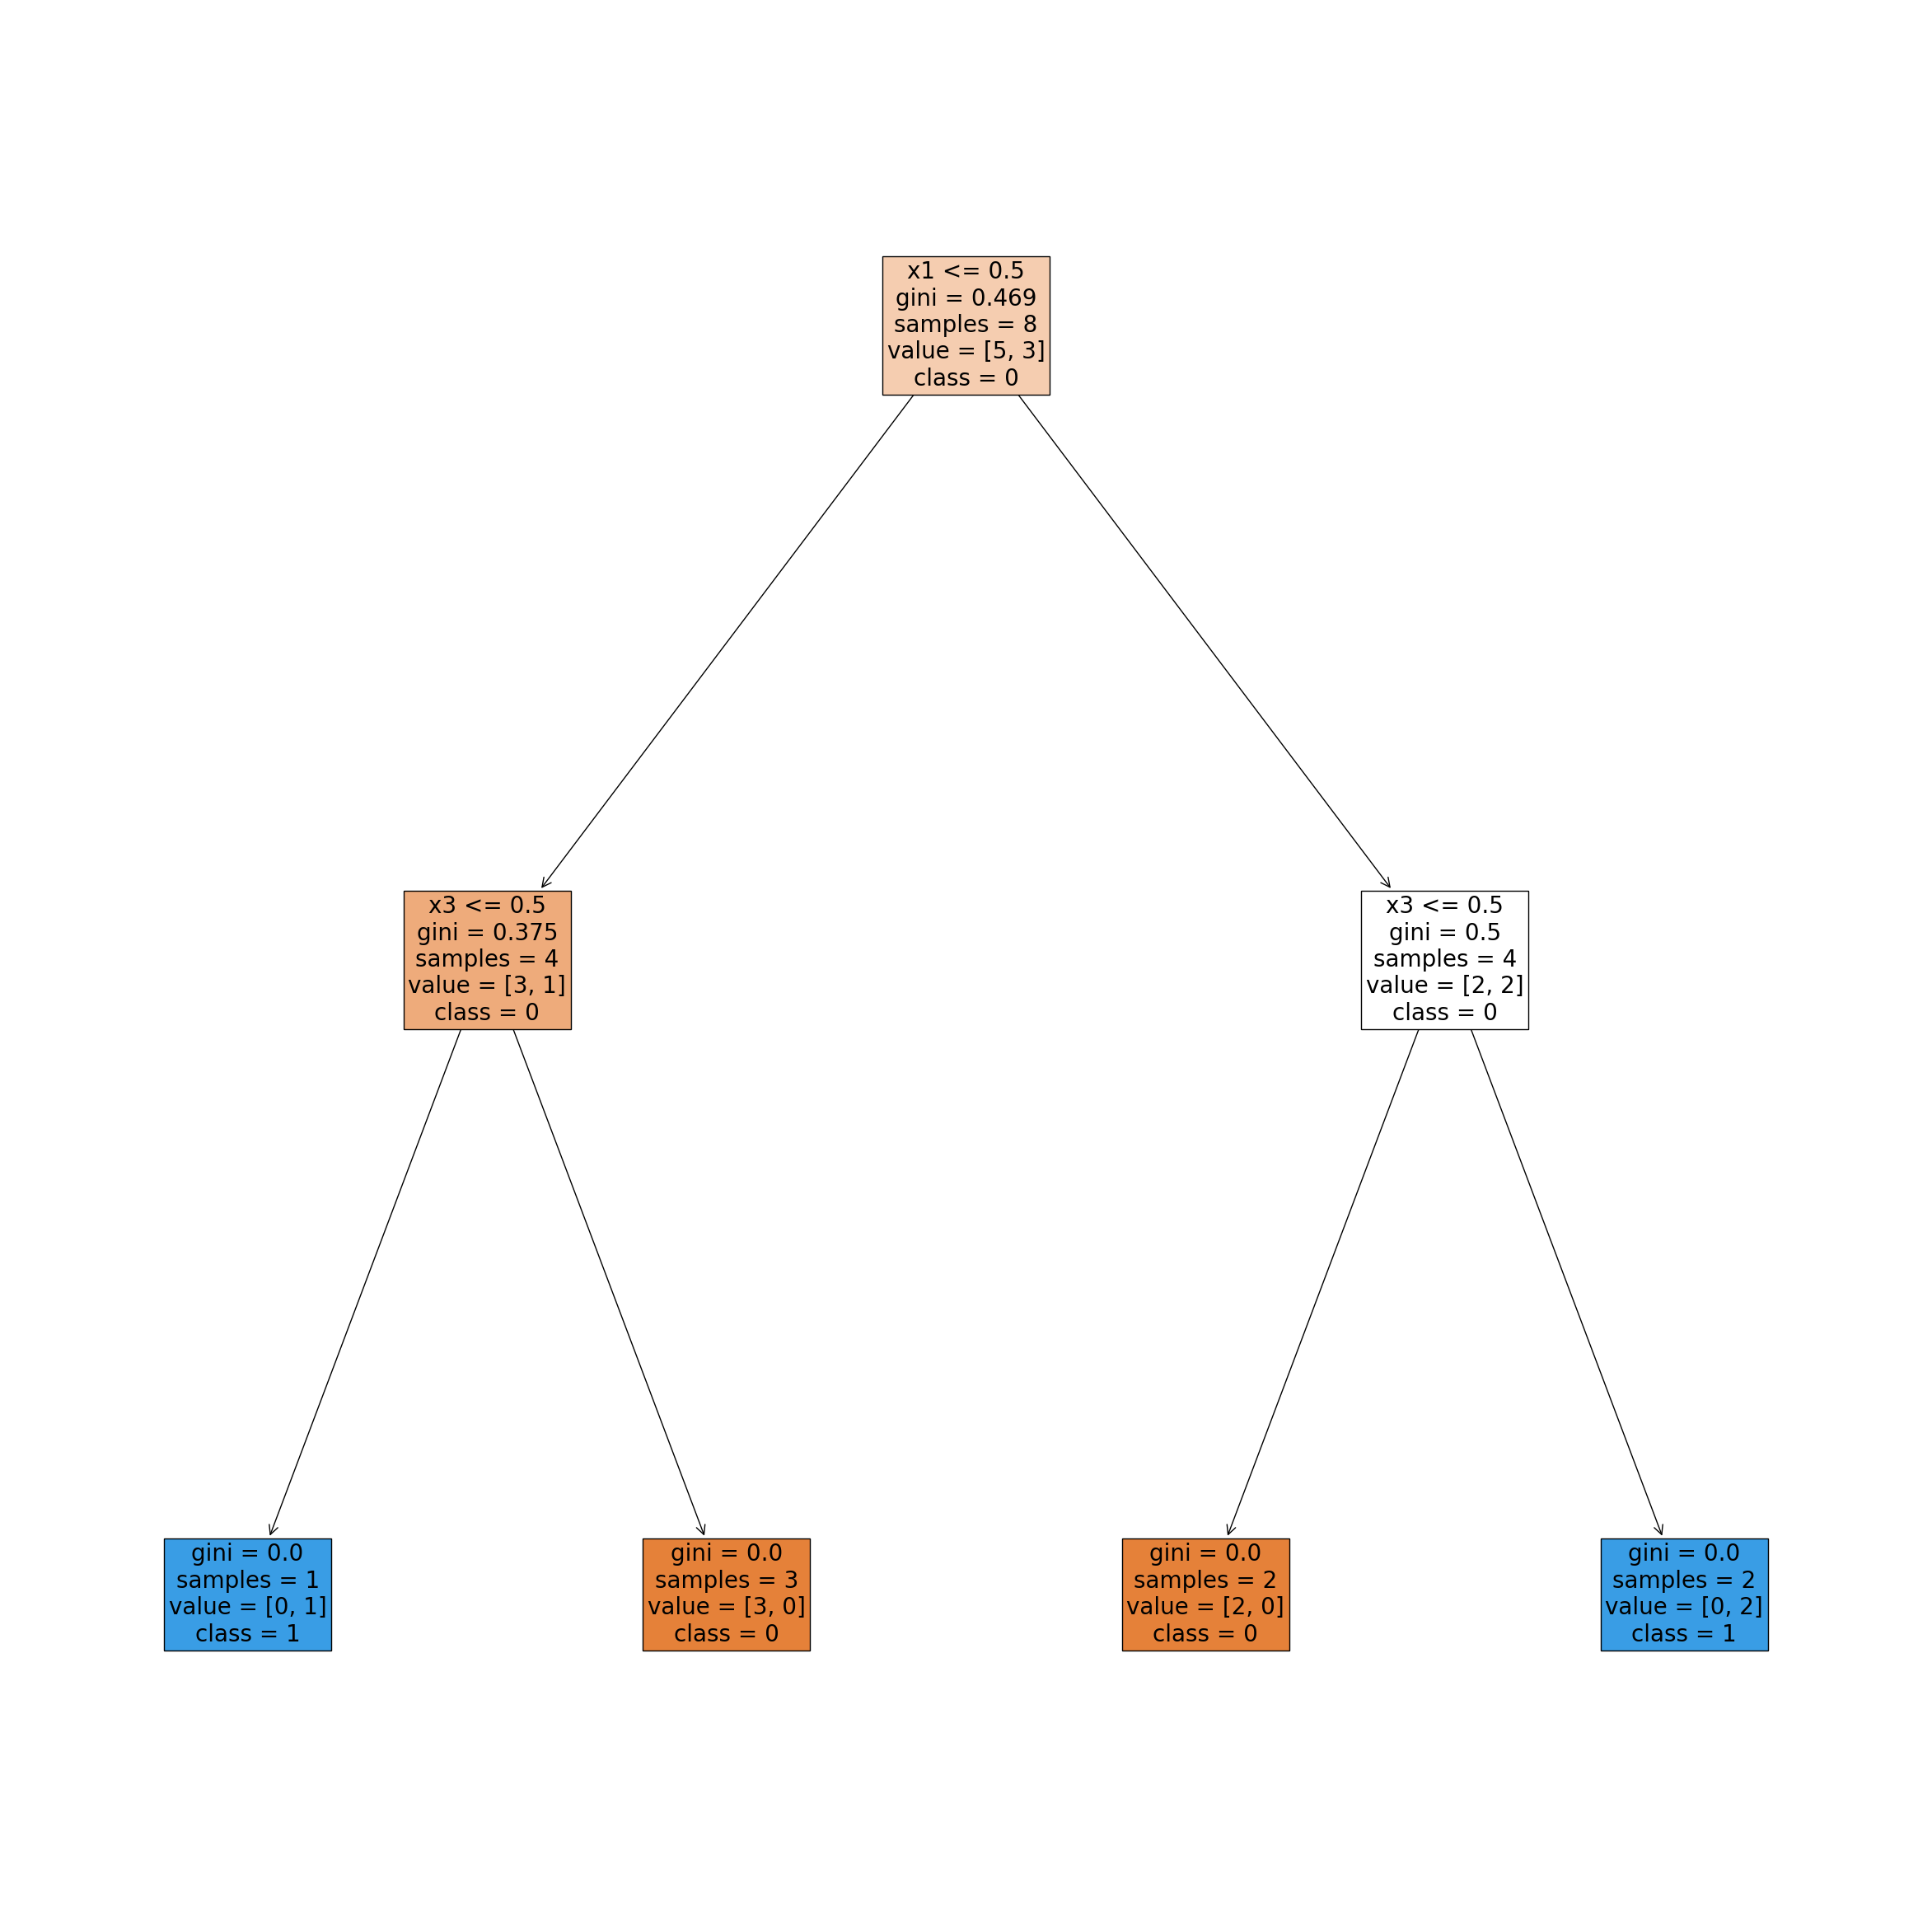

In [9]:
plt.figure(figsize = (30, 30))
tree.plot_tree(dtree, fontsize=20, feature_names=x.columns, filled = True, class_names=['0', '1'])
plt.show()